# 4.9 IC Intro to Data Visualisation with Python Exercise

## Contents:

### 01. Importing Libraries

### 02. Creating Bar Charts

### 03. Creating Histogramsn & Scatter Plots

### 04. Sampling & Line Charts

#### 01. Importing Libraries

In [1]:
# Import libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing df_ords_prods_merge
path = r'/Users/yaseminmustafa/Desktop/CareerFoundry/Exercise 4/15-05-2025_Instacart Basket Analysis'

In [3]:
ords_prods_merge = pd.read_pickle(os.path.join(path,"02_Data/Prepared Data/ords_prods_merge_grouped.pkl"))

#### 02. Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

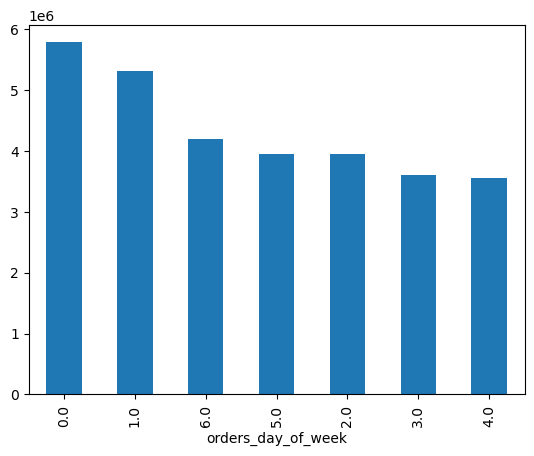

In [4]:
# Create bar chart 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

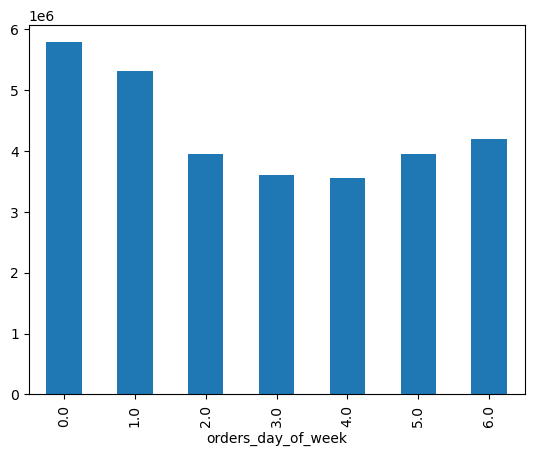

In [5]:
# Order bars according to index
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [6]:
# Print frequency 
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0.0    5779087
1.0    5303718
6.0    4190948
5.0    3952326
2.0    3947564
3.0    3600589
4.0    3554531
NaN    2076096
Name: count, dtype: int64

In [7]:
# Print frequency according to index
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0.0    5779087
1.0    5303718
2.0    3947564
3.0    3600589
4.0    3554531
5.0    3952326
6.0    4190948
Name: count, dtype: int64

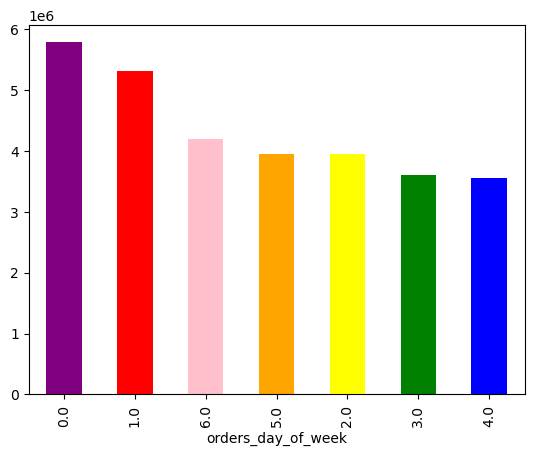

In [8]:
# Add colour to created bar chart 
bar1 = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

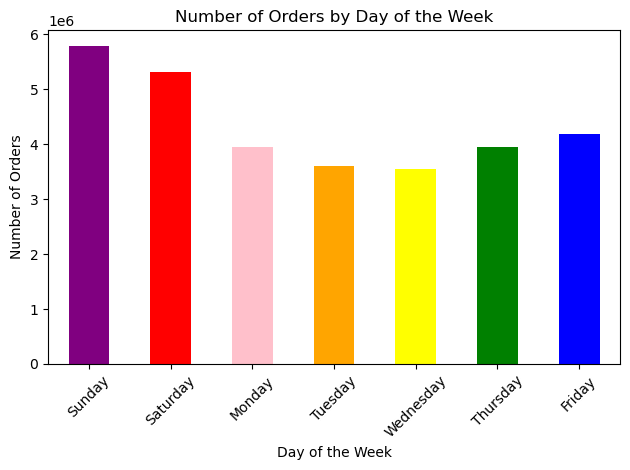

In [10]:
# Add colour to created indexed bar chart 

# Mapping numbers to day names
day_labels = {
    0: 'Sunday',
    1: 'Saturday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday'  
}

# Get value counts and sort by index
order_counts = ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

bar2 = order_counts.plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Setting custom tick labels
bar2.set_xticklabels([day_labels.get(i, f"Day {i}") for i in order_counts.index])

# Setting titles and labels
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()

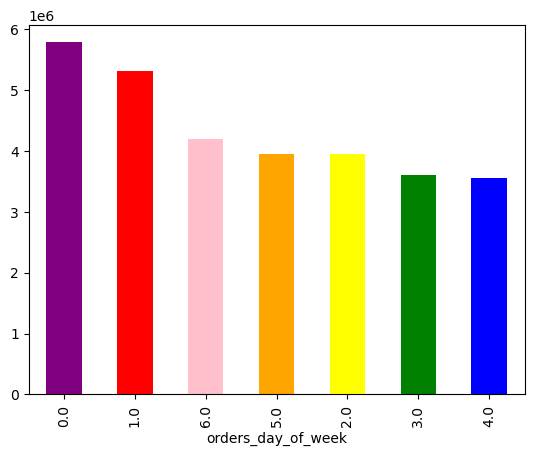

In [11]:
# Call bar chart 1
bar1.figure

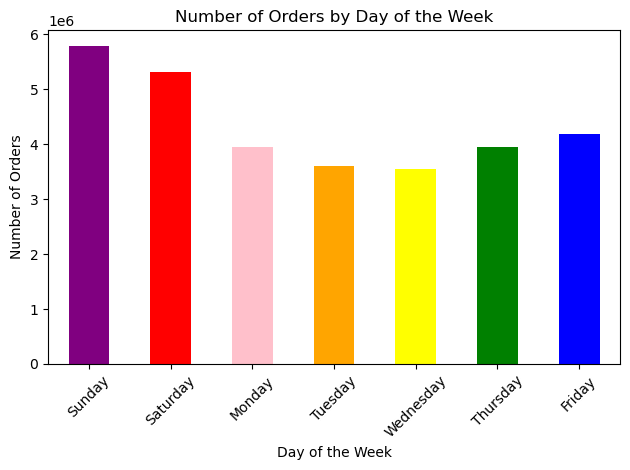

In [12]:
# Call bar chart 2
bar2.figure

In [13]:
# Export bar1 as a png
bar1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_orders_dow1.png'))

In [14]:
# Export bar2 as a png
bar2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'bar_orders_dow2.png'))

#### 03. Creating Histograms & Scatterplots

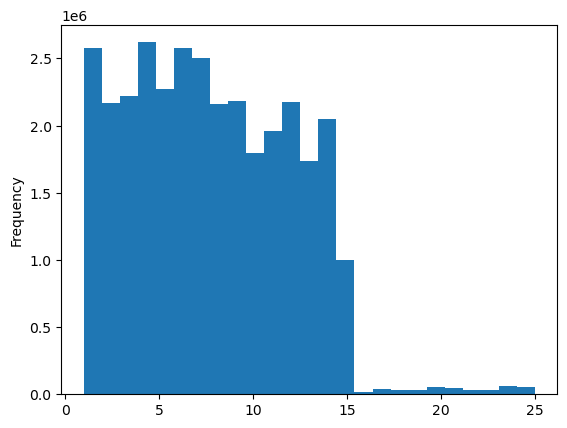

In [61]:
# Creating a histogram
hist1 = ords_prods_merge['prices'].plot.hist(bins = 25)

In [62]:
# Check descriptive statistics of 'prices'
ords_prods_merge['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [63]:
# Check specific statistics 
ords_prods_merge['prices'].mean()

7.790994092173352

In [64]:
ords_prods_merge['prices'].median()

7.4

In [65]:
ords_prods_merge['prices'].max()

25.0

##### There appears to be a strange value of 99,999 forcing the histogram to shove all the small values into one bar and the extreme value in another.
##### This was amended in 4.6: 
##### Identify values above $100 - ords_prods_merge.loc[ords_prods_merge['prices'] > 100]
##### Turn anomaly values into NaNs - copy into exercise - ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan
##### Check max orders - ords_prods_merge['prices'].max()

<Axes: xlabel='prices', ylabel='prices'>

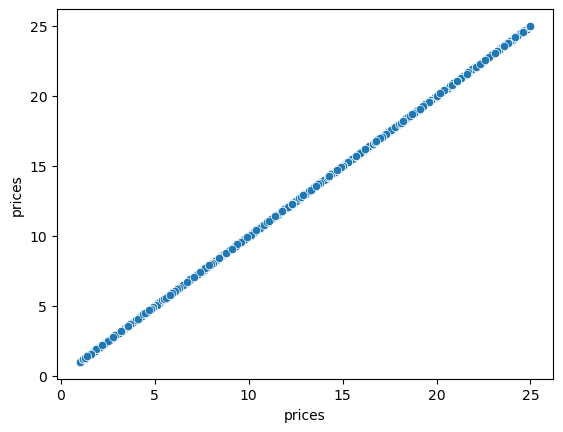

In [66]:
# Create a scatterplot to identify the outlier
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [67]:
# Check max orders
ords_prods_merge['prices'].max()

25.0

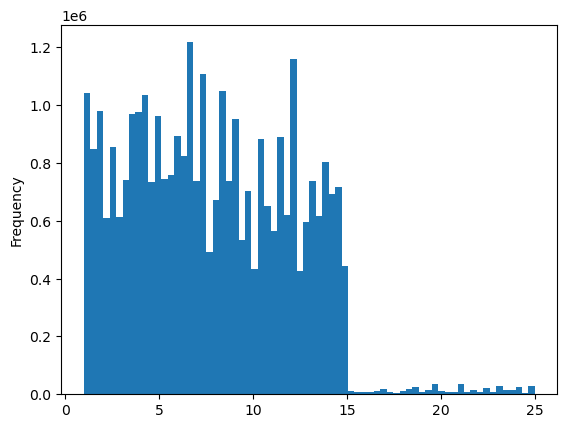

In [68]:
# Increase granularity
hist2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [69]:
# Export hist1 as a png
hist1.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_prices_dow1.png'))

In [70]:
# Export hist2 as a png
hist2.figure.savefig(os.path.join(path, '04_Analysis','Visualisations', 'hist_prices_dow2.png'))

#### 04. Sampling & Line Charts

In [71]:
# Creating a list holding True/Fake values to the test np.random.rand() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [72]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [73]:
# Store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [74]:
# Confirming what length of outsput should be
len(ords_prods_merge)

32404859

In [75]:
# Checking what length of output created is 
len(big) + len(small)

32404859

In [76]:
# Reduce sample to only necessary columns
df_2 = small[['orders_day_of_week','prices']]

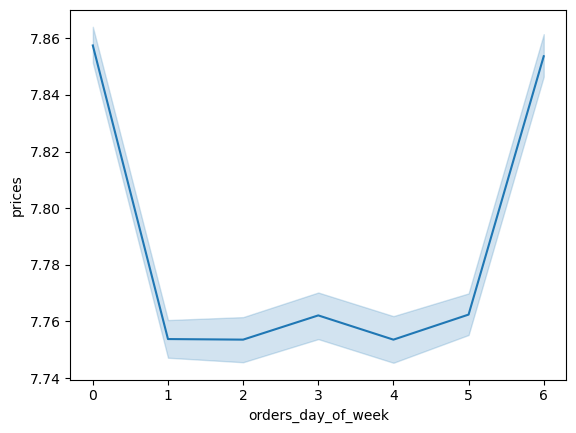

In [77]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')